### Data 
The following steps was done:
- Data Understanding
- Data Cleaning 
- Data Visualistion

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [2]:
# Import Data
df = pd.read_csv('../Data/mxmh_survey_results.csv')

df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


Three Part of Data:
1. Background of respondents (10)
2. Frequency of each genre (16)
3. Ranking of mental health (4)
4. Others - survey related (2 - Timestamp & Permissions)

Target variable: Music Effects

In [3]:
# Remove Timestamp & Permissions columns 
df.drop(columns=['Timestamp', 'Permissions'], inplace=True)
df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


In [4]:
# Check Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           735 non-null    float64
 1   Primary streaming service     735 non-null    object 
 2   Hours per day                 736 non-null    float64
 3   While working                 733 non-null    object 
 4   Instrumentalist               732 non-null    object 
 5   Composer                      735 non-null    object 
 6   Fav genre                     736 non-null    object 
 7   Exploratory                   736 non-null    object 
 8   Foreign languages             732 non-null    object 
 9   BPM                           629 non-null    float64
 10  Frequency [Classical]         736 non-null    object 
 11  Frequency [Country]           736 non-null    object 
 12  Frequency [EDM]               736 non-null    object 
 13  Frequ

In [5]:
# Summary Statistics for float data type
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


Only 7 columns with float data type:
1. Age
2. Hours per day
3. BPM
4. Anxiety
5. Depression
6. Insomnia
7. OCD

The rest of the columns are object data type. 
Hence, there is a need to decode these object data first before implement it to model.

In [6]:
# Checking for missing values
df.isnull().sum()

Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                  

In [7]:
# Remove missing value for columns besides BPM
columns_to_clean = ['Age', 'Music effects', 'Primary streaming service', 'While working', 'Instrumentalist', 'Foreign languages']
df.dropna(subset=columns_to_clean, inplace=True)

print(df[columns_to_clean].isnull().sum())

Age                          0
Music effects                0
Primary streaming service    0
While working                0
Instrumentalist              0
Foreign languages            0
dtype: int64


In [8]:
print(df['BPM'].describe())

count    6.160000e+02
mean     1.623500e+06
std      4.029114e+07
min      0.000000e+00
25%      1.000000e+02
50%      1.200000e+02
75%      1.440000e+02
max      1.000000e+09
Name: BPM, dtype: float64


In [9]:
# Remove outlier (the max) based on the current research on the highest BPM
# As the outlier is too large, causing error when running the plt
threshold = 1015
df = df[df['BPM'] <= threshold]

In [10]:
# Remove outlier (the min) as missing value
# There is no BPM with 0 in reality, hence it is obviously as an outline
df['BPM'] = df['BPM'].astype('Float64')
df['BPM'].replace(0, pd.NA, inplace=True)

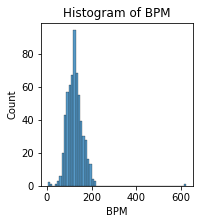

In [11]:
df['BPM'] = df['BPM'].astype(float)

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
sns.histplot(df['BPM'], kde=False)
plt.title('Histogram of BPM')
plt.show()

In [12]:
# Second round of removing the outlier based on the plot we seen above
outlier_threshold = 600
df = df[df['BPM'] <= outlier_threshold]

Text(0.5, 1.0, 'Histogram of BPM')

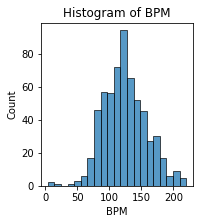

In [13]:
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
sns.histplot(df['BPM'], kde=False)
plt.title('Histogram of BPM')

In [14]:
# Replace null values of BPM with the median
median_value = df['BPM'].median()
df['BPM'].fillna(median_value, inplace=True)

In [15]:
# Saved the first round of cleaned code
# df.to_pickle('../Data/output/df.pkl')
# df.to_csv('data_cleaned.csv', index=False)

#### Data Pre-process

In [16]:
df_process = df.copy()

In [17]:
df_process.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,24.790507,3.704910,123.368249,5.876432,4.877250,3.789689,2.638298
std,11.685439,3.077699,33.058918,2.759758,2.994337,3.106636,2.848515
min,10.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,100.000000,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,120.000000,6.000000,5.000000,3.000000,2.000000
75%,27.000000,5.000000,144.000000,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,220.000000,10.000000,10.000000,10.000000,10.000000


In [18]:
# Normalize numerical data through Standard Scaling
stanard_scaler = StandardScaler()

numeric_columns = ['Age', 'Hours per day', 'BPM']
df_process[numeric_columns] = stanard_scaler.fit_transform(df_process[numeric_columns])

In [19]:
# Normalize numerical data through Min-Max Scaling
min_max_scaler = MinMaxScaler()

mental_columns = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
df_process[mental_columns] = min_max_scaler.fit_transform(df_process[mental_columns])

In [20]:
# Encode categories into numerical value from 0-3
mapping = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3}
genre_freq_columns = ['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']

for column in genre_freq_columns:
    df_process[column] = df_process[column].replace(mapping)

In [21]:
df_process.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,-0.581585,Spotify,0.095959,No,No,No,Video game music,No,Yes,0.261316,...,1,0,1,1,3,0.7,0.7,1.0,0.2,No effect
3,3.101224,YouTube Music,-0.391818,Yes,No,Yes,Jazz,Yes,Yes,-1.191827,...,2,2,0,0,0,0.9,0.7,0.3,0.3,Improve
4,-0.581585,Spotify,0.095959,Yes,No,No,R&B,Yes,No,-0.495529,...,2,3,3,0,1,0.7,0.2,0.5,0.9,Improve
5,-0.581585,Spotify,0.421143,Yes,Yes,Yes,Jazz,Yes,Yes,-1.131279,...,3,3,3,3,0,0.8,0.8,0.7,0.7,Improve
6,-0.581585,YouTube Music,-0.229226,Yes,Yes,No,Video game music,Yes,Yes,-1.736755,...,1,1,0,0,2,0.4,0.8,0.6,0.0,Improve


In [22]:
# One-hot encoding Categorical data
df_encoded = pd.get_dummies(df_process, drop_first=False, dtype='int64')

In [23]:
df_encoded.head()

,Age,Hours per day,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],...,Fav genre_Rap,Fav genre_Rock,Fav genre_Video game music,Exploratory_No,Exploratory_Yes,Foreign languages_No,Foreign languages_Yes,Music effects_Improve,Music effects_No effect,Music effects_Worsen
2,-0.581585,0.095959,0.261316,0,0,3,0,0,1,1,...,0,0,1,1,0,0,1,0,1,0
3,3.101224,-0.391818,-1.191827,2,0,0,1,2,0,3,...,0,0,0,0,1,0,1,1,0,0
4,-0.581585,0.095959,-0.495529,0,0,1,0,1,3,0,...,0,0,0,0,1,1,0,1,0,0
5,-0.581585,0.421143,-1.131279,1,2,0,0,0,2,3,...,0,0,0,0,1,0,1,1,0,0
6,-0.581585,-0.229226,-1.736755,2,0,1,2,1,1,2,...,0,0,1,0,1,0,1,1,0,0


In [122]:
df_encoded.to_csv('encoded.csv', index=False)

In [24]:
# Saved the pre-processed code
# df_encoded.to_pickle('../Data/output/df_encoded.pkl')


#### Data Visualization

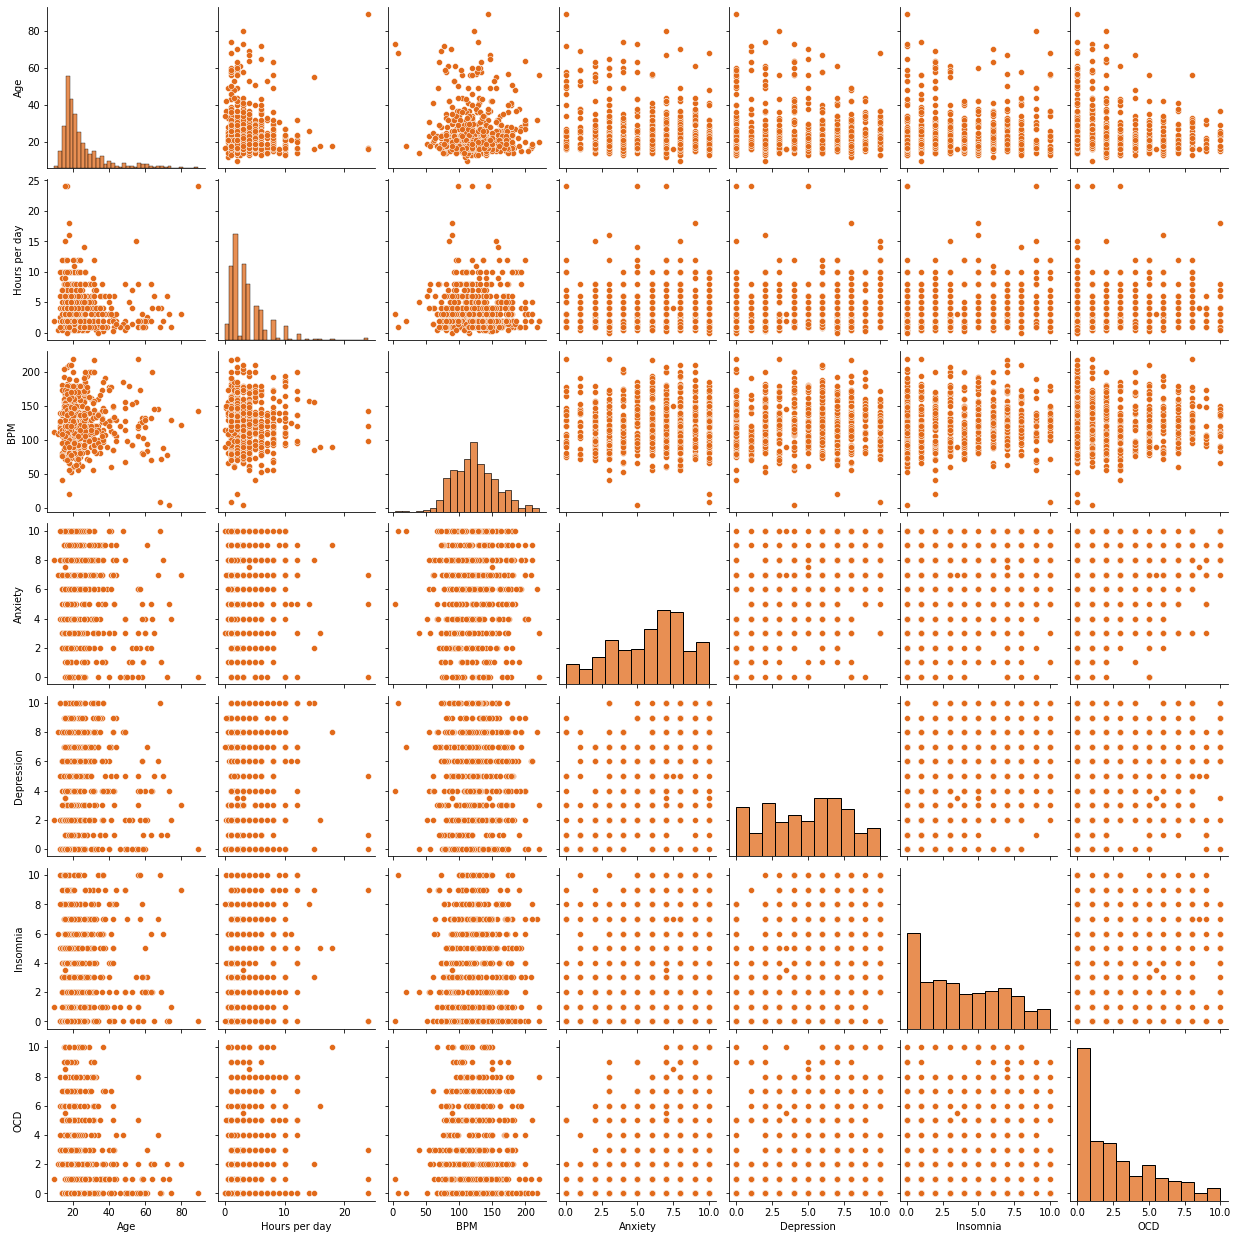

In [31]:
sns.pairplot(df[['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD']])
plt.show()

# numeric_columns = ['Age', 'Hours per day', 'Anxiety', 'Depression', 'Insomnia', 'OCD']
# sns.pairplot(df[numeric_columns])
# plt.show()

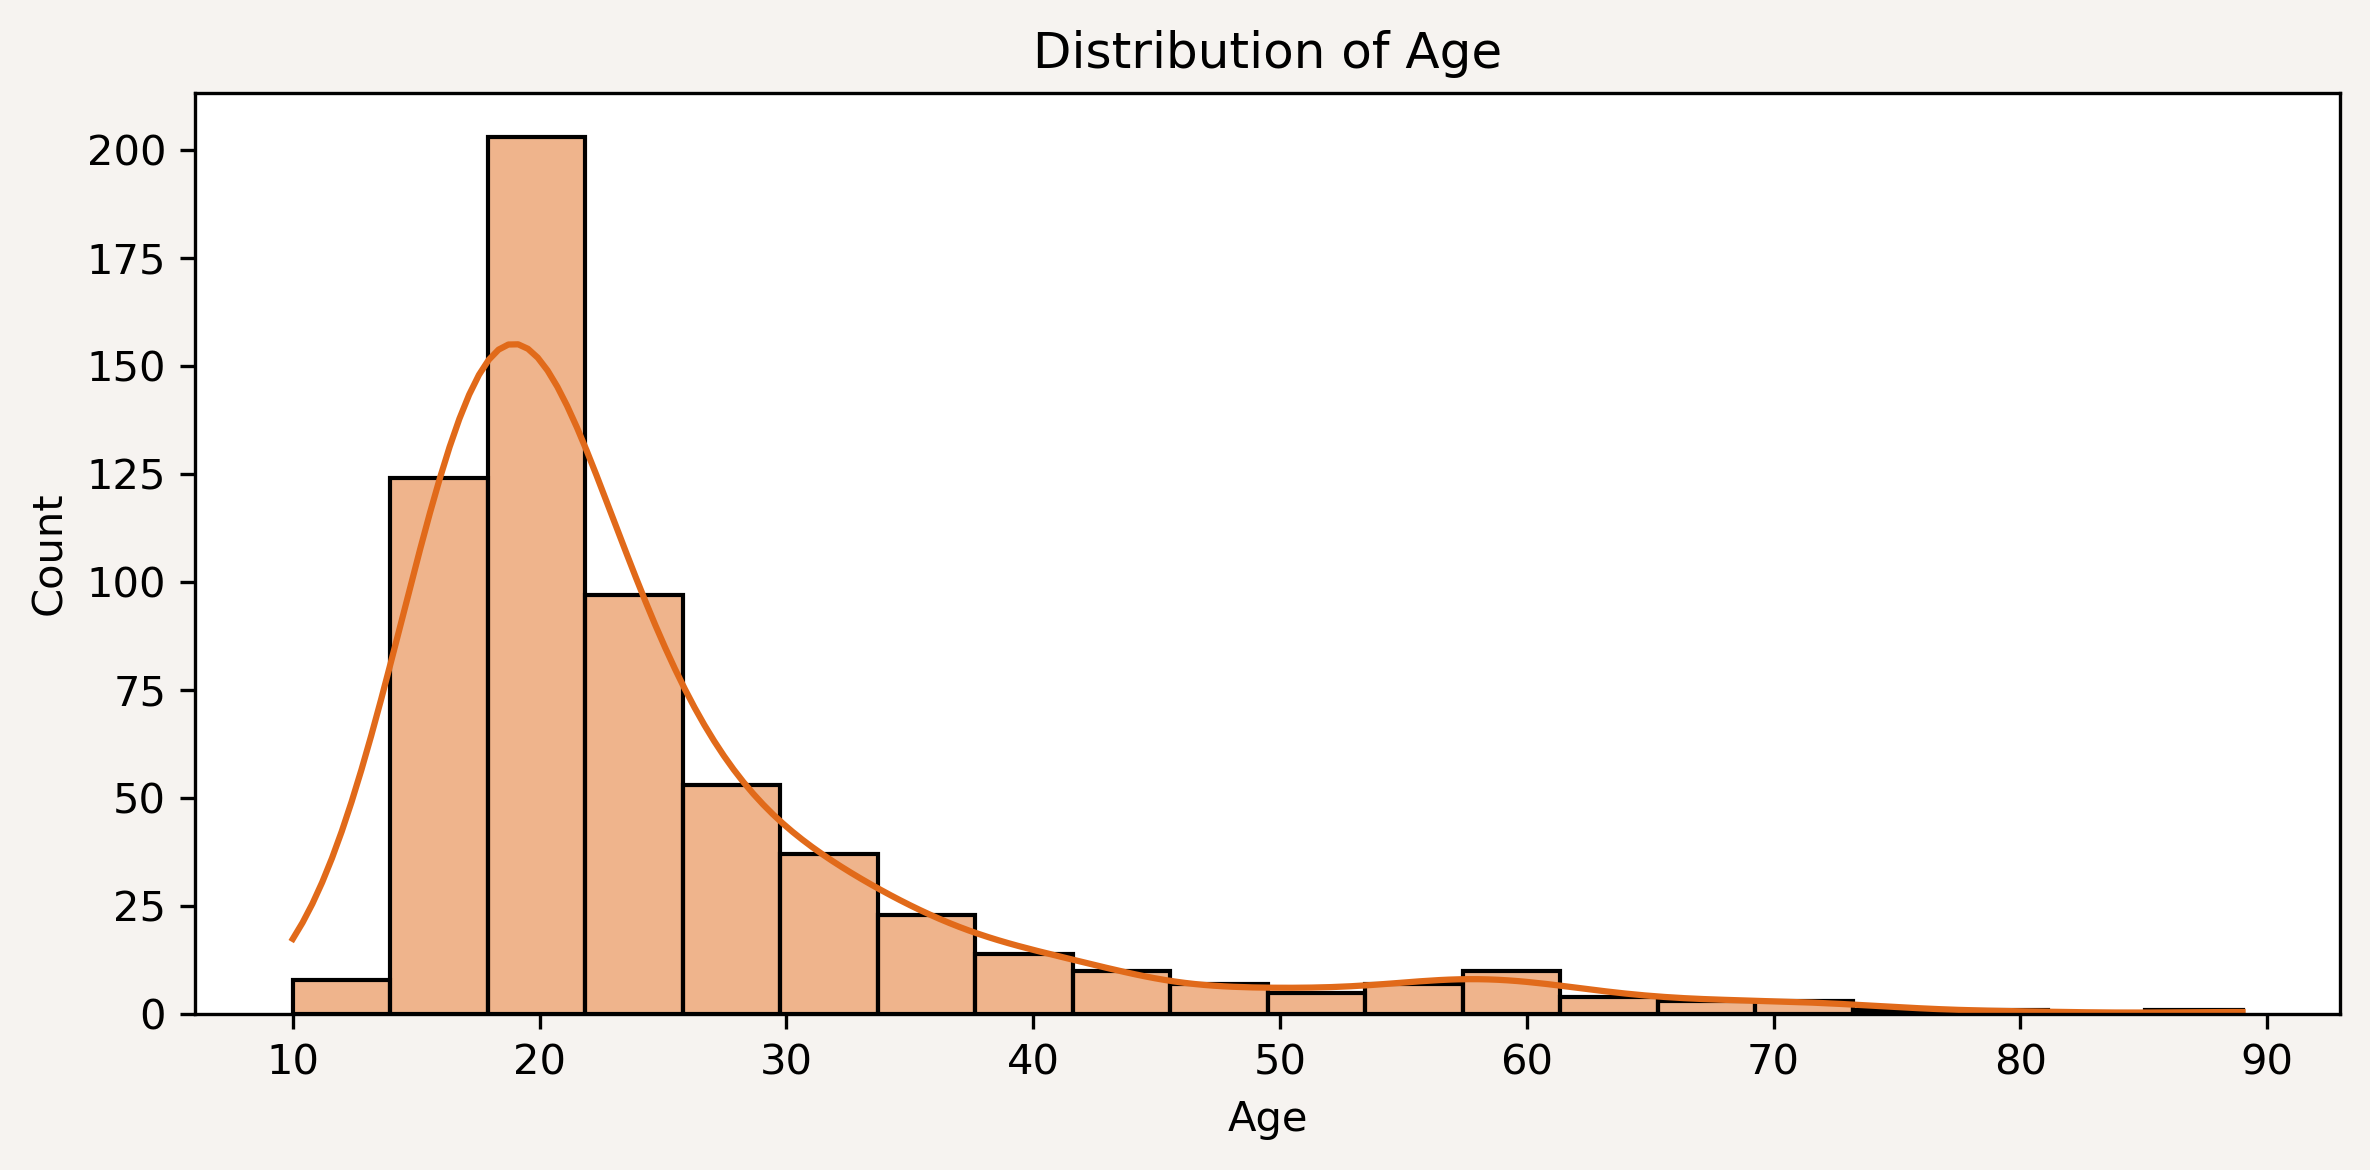

In [32]:
# Set the color palette
sns.set_palette(['#E16A1A'])

# Create a figure with the desired background color and higher resolution
plt.figure(figsize=(8, 4), dpi=300, facecolor='#F6F3F0')

# Plot the histogram with the specified color
sns.histplot(df['Age'], bins=20, kde=True, color='#E16A1A')

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()  # Ensures tight layout to prevent clipping of labels
# plt.savefig('Distribution_of_Age.png', dpi=300)  # Save the figure with higher resolution
plt.show()